<a href="https://colab.research.google.com/github/rugellioliveira/AnaliseExploratoriaDadosAreaVarejo/blob/main/AnaliseExploratoriaDadosAreaVarejo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='green' ><b>Análise Exploratória de Dados em Linguagem Python para a Área de Varejo</b></font>

In [118]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Projeto:', python_version())

Versão da Linguagem Python Usada Neste Projeto: 3.10.12


In [119]:
# Imports de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import locale

## Carregando os Dados

In [120]:
# Carrega o dataset
df = pd.read_csv('dados.csv')

In [121]:
# Dimensão
df.shape

(9700, 11)

In [122]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [123]:
# Amostra dos dados
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [124]:
# Colunas do conjunto de dados
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [125]:
# Verificando o tipo de dado de cada coluna
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [126]:
# Resumo estatístico da coluna com o valor de venda
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [127]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [128]:
# Verificando de há valores ausentes
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [129]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [130]:
# Filtrando o dataframe com os registros da categoria que desejamos
df1 = df[df['Categoria'] == 'Office Supplies']

# Agrupando por cidade e calculamos o total de valor_venda
df1_total = df1.groupby('Cidade')['Valor_Venda'].sum()

# Encontrando a cidade com maior valor de venda
cidade_maior_venda = df1_total.idxmax()
print("Cidade com maior valor de venda para a categoria 'Office Supplies' é:", cidade_maior_venda)

Cidade com maior valor de venda para a categoria 'Office Supplies' é: New York City


In [131]:
# Conferindo o resultado de vendas para cada cidade
df1_total.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [132]:
# Agrupando por data do pedido
df2_total = df.groupby('Data_Pedido')['Valor_Venda'].sum()
df2_total.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

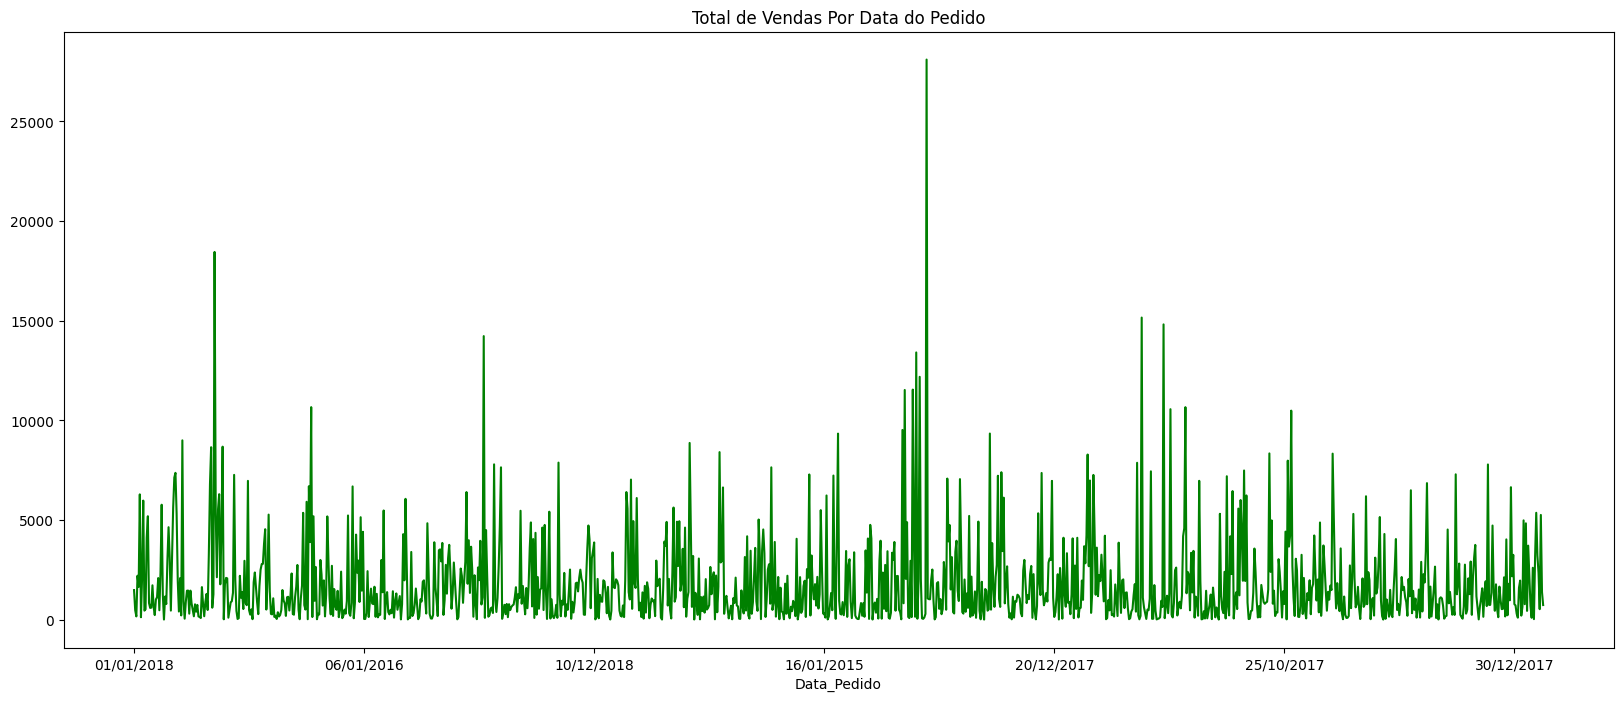

In [133]:
# Plot
plt.figure(figsize = (20, 8))
df2_total.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [134]:
df3_total = df.groupby('Estado')['Valor_Venda'].sum().reset_index()
df3_total.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


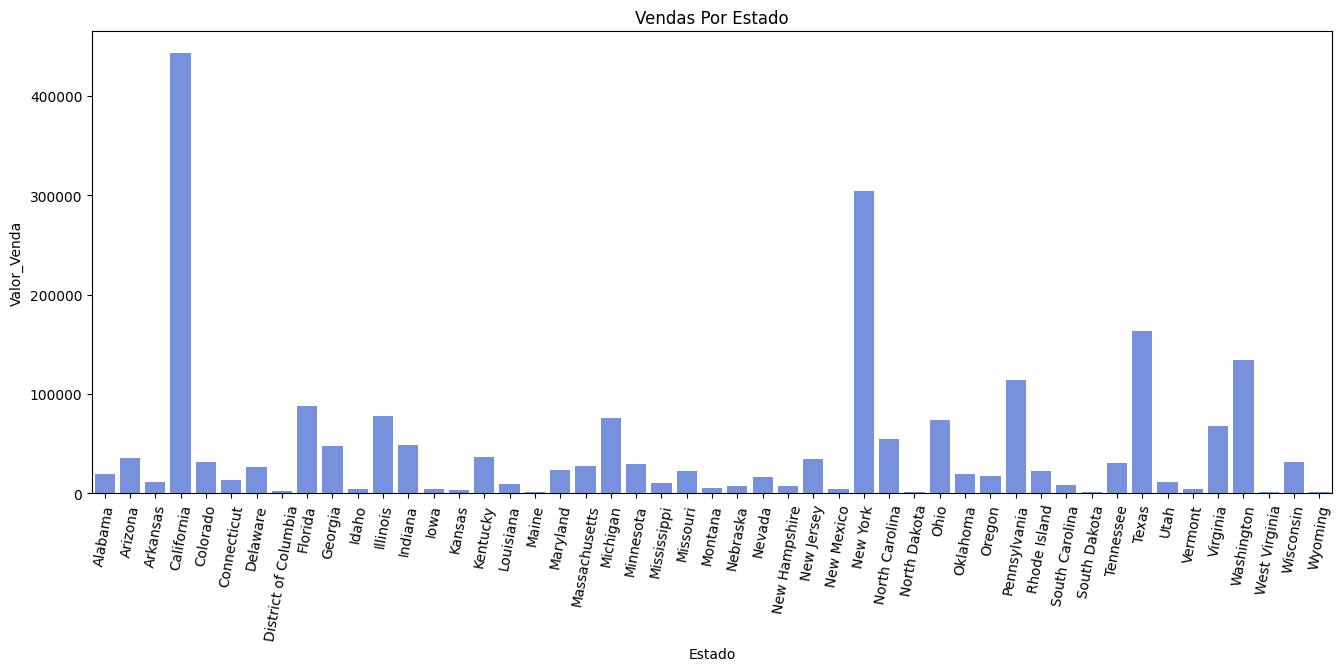

In [135]:
# Plot
plt.figure(figsize = (16, 6))
sns.barplot(data = df3_total,
            y = 'Valor_Venda',
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [136]:
# Agrupando por cidade com que mais venderam ordenando em ordem decrescente e coletando só as 10 primeiras
df4_total = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                    ascending = False).head(10)
df4_total.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


In [137]:
# Função formatar número para formato brasileiro
def formatar_numero(numero):
    return "{:,.2f}".format(numero).replace('.', '#').replace(',', '.').replace('#', ',')

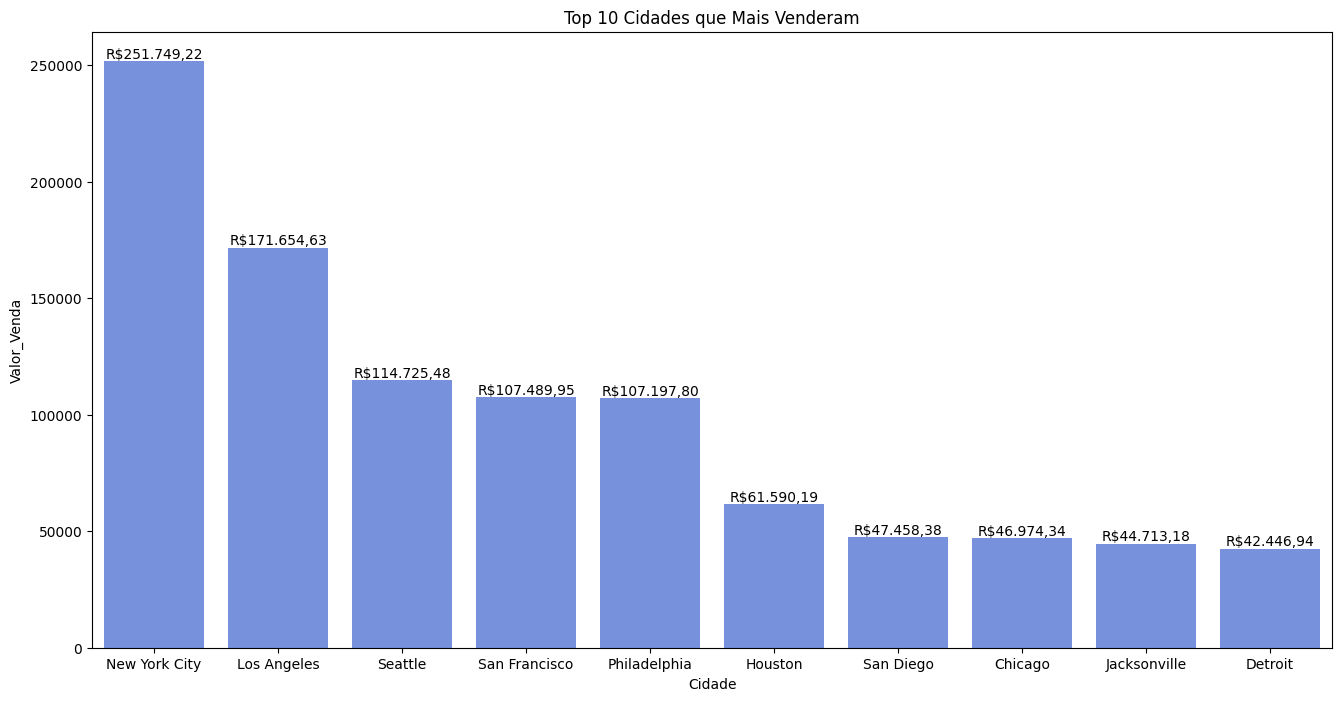

In [138]:
# Plot
plt.figure(figsize = (16, 8))
sns.set_palette("coolwarm")
ax = sns.barplot(data = df4_total,
            y = 'Valor_Venda',
            x = 'Cidade')

# Adicionar rótulos de dados nas barras com o símbolo R$ (reais)
for i, v in enumerate(df4_total['Valor_Venda']):
    ax.text(i, v + 1, f'R${(formatar_numero(v))}', ha='center', va='bottom', fontsize=10)

plt.title('Top 10 Cidades que Mais Venderam')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [139]:
# Agrupando por segmento e calculando o total de venda
df5_total = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)
df5_total.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [140]:
# Função para converter os dados em valor absoluto
def autopct_format(values):
    def novo_formato(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return novo_formato

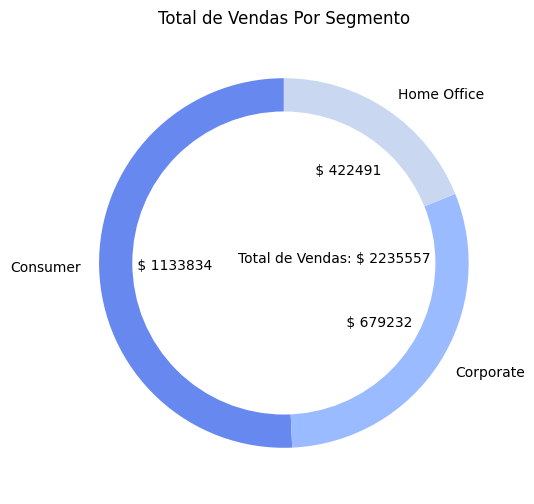

In [141]:
# Plot
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(df5_total['Valor_Venda'],
        labels = df5_total['Segmento'],
        autopct = autopct_format(df5_total['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centro_circulo = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df5_total['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [143]:
# Convertemos a coluna de data para o tipo datetime para obter o formato adequado
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

#Conferindo
df.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [144]:
# Extraindo o ano para criar nova coluna no Dataframe
df['Ano'] = df['Data_Pedido'].dt.year
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [147]:
# Agrupando total de vendas por segmento e por ano
df6_total = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

df6_total.head()

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
Name: Valor_Venda, dtype: float64

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [172]:
# Cria uma nova coluna de acordo com a regra definida acima
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [180]:
# Quantas vendas recebem desconto de 15% ?
print(f"No Total {(df['Desconto'] == 0.15).sum()} Vendas Receberiam Desconto de 15%.")

No Total 457 Vendas Receberiam Desconto de 15%.


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [182]:
# Criamos uma coluna calculando o valor de venda menos o desconto
df['Valor_Venda_Desconto'] = df['Valor_Venda'] - (df['Valor_Venda'] * df['Desconto'])
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120


In [185]:
# Filtrando as vendas antes do desconto de 15%
df_vendas_antes_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']

# Filtrando as vendas depois do desconto de 15%
df_vendas_depois_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda_Desconto']

# Calcula a média das vendas antes do desconto de 15%
media_vendas_antes_desconto = df_vendas_antes_desconto.mean()

# Calcula a média das vendas depois do desconto de 15%
media_vendas_depois_desconto = df_vendas_depois_desconto.mean()

print("Média das vendas antes e após o desconto de 15%, respectivamente:", "R$",formatar_numero(round(media_vendas_antes_desconto, 2)),
                                                   " e R$",formatar_numero(round(media_vendas_depois_desconto, 2)))

Média das vendas antes e após o desconto de 15%, respectivamente: R$ 2.116,81  e R$ 1.799,29


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [187]:
# Extraindo o mês e criando nova coluna no Dataframe
df['Mês'] = df['Data_Pedido'].dt.month
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Valor_Venda_Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,13.15800,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,20.13120,10


In [190]:
# Agrupando por ano, mês e segmento e calculando estatísticas de agregação
df9_total = df.groupby(['Ano', 'Mês', 'Segmento'])['Valor_Venda'].agg([np.sum, np.mean, np.median])
df9_total

sum        mean  median
Ano  Mês Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [193]:
#Extraindo os valores das colunas do Dataframe
anos = df9_total.index.get_level_values(0)
meses = df9_total.index.get_level_values(1)
segmentos = df9_total.index.get_level_values(2)

<Figure size 2000x800 with 0 Axes>

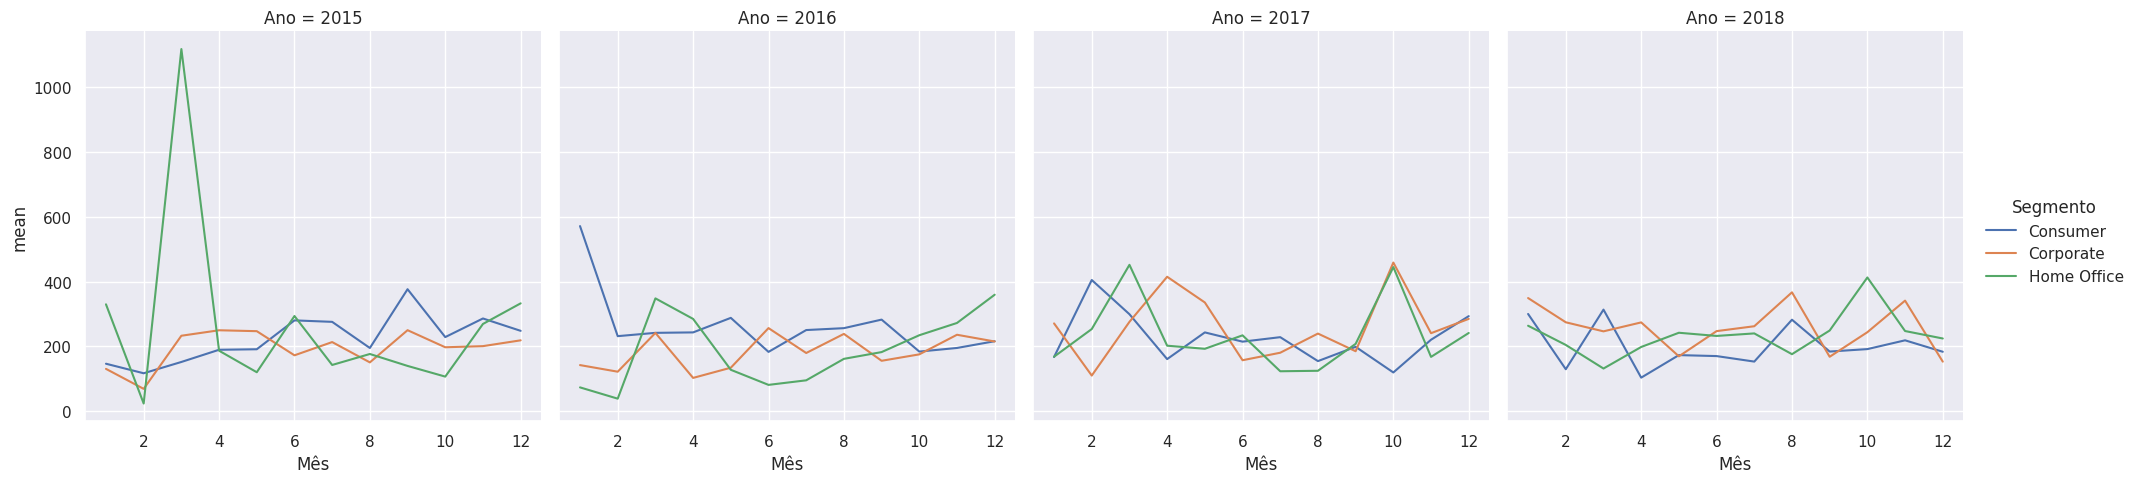

In [195]:
# Plot
plt.figure(figsize = (20, 8))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df9_total,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?

Demonstre tudo através de um único gráfico.

In [196]:
# Agrupando por categoria e subcategoria e calculamos a soma somente para variáveis numéricas
df10_total = df.groupby(['Categoria',
                             'SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda',
                                                                                   ascending = False).head(12)

In [197]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df10_total = df10_total[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [198]:
# Dataframe com categorias e subcategorias
df10_total

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [201]:
# Criando outro Dataframe somente com os totais por categoria
df10_categorias = df10_total.groupby('Categoria').sum(numeric_only = True).reset_index()

# Dataframe com categorias
df10_categorias

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [204]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [202]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

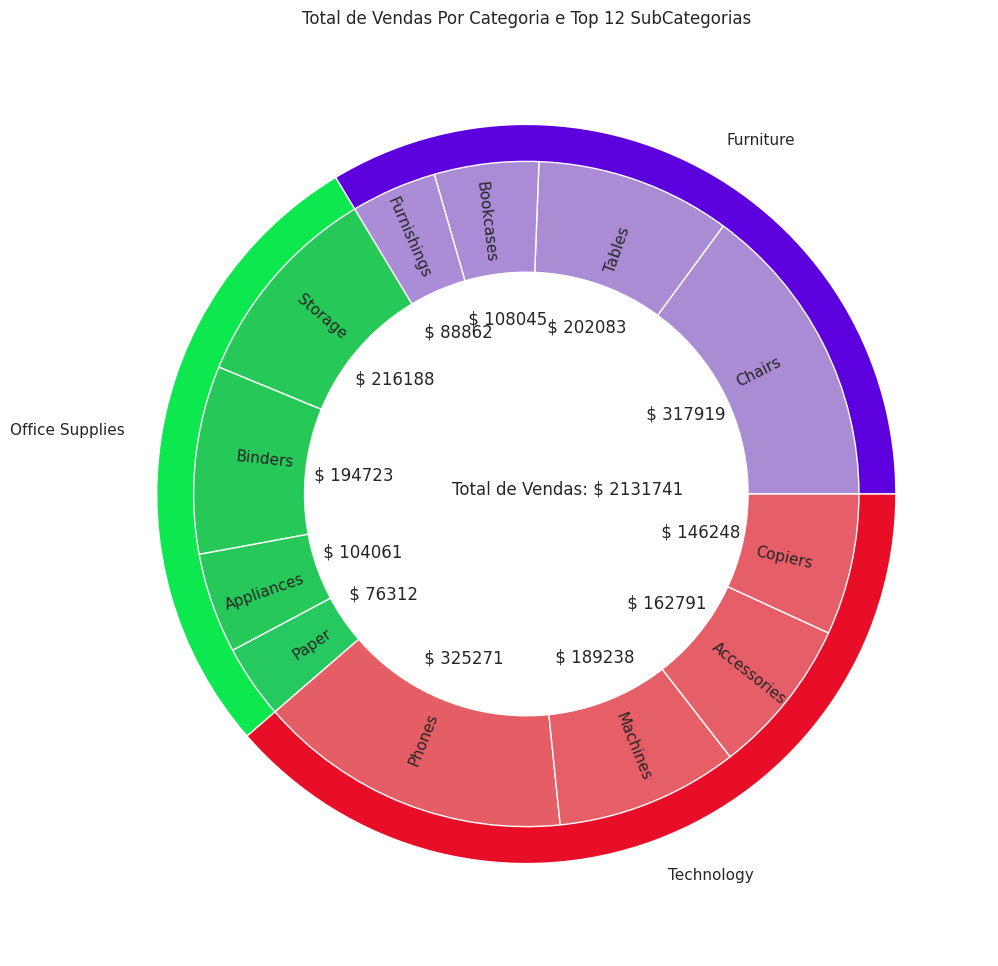

In [206]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df10_categorias['Valor_Venda'],
            radius = 1,
            labels = df10_categorias['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df10_total['Valor_Venda'],
            radius = 0.9,
            labels = df10_total['SubCategoria'],
            autopct = autopct_format(df10_total['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df10_total['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()